# ML for Finance
## Fall 2020
## Lesson 8
---

### PART 1. Supervised Learning Solutions

In [1]:
# TECHNICAL CELL
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Transactions Data (https://www.dropbox.com/s/3oyrho6agd7clpm/transactions.csv?dl=1)
transactions = pd.read_csv('data/transactions.csv')

In [3]:
transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


In [4]:
# Extract day number
transactions['day'] = transactions.tr_datetime.apply(lambda x: int(x.split(' ')[0]))

In [5]:
transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,day
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,0
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,1
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,1
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,1
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,2


In [6]:
transactions.shape

(6849346, 7)

In [7]:
# Transactions per day
gr = transactions.groupby('day')['amount'].count()

In [9]:
gr.sum()

6849346

In [11]:
gr

day
0      12797
1      10143
2       8845
3      11321
4      12142
5      11798
6      11619
7      12952
8      10500
9       9110
10     11832
11     11825
12     12271
13     12650
14     13348
15     10849
16      8917
17     11881
18     12397
19     13129
20     12847
21     13096
22     10308
23      9507
24     11931
25     12762
26     12514
27     12205
28     13028
29     11676
       ...  
427    19078
428    16061
429    13611
430    17313
431    17978
432    18682
433    18514
434    19772
435    16881
436    14051
437    17714
438    19012
439    18889
440    19600
441    20203
442    17036
443    14279
444    17076
445    18803
446    19551
447    18966
448    20178
449    16726
450    14170
451    17661
452    17749
453    18262
454    17910
455    19192
456    16756
Name: amount, Length: 457, dtype: int64

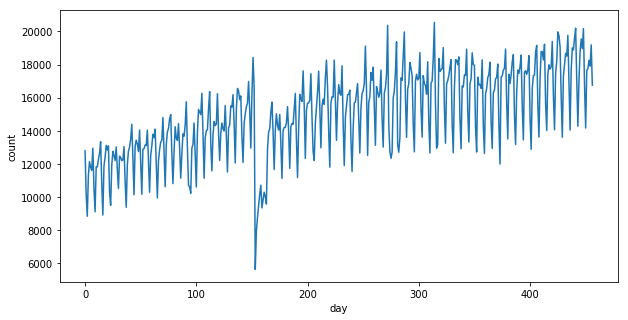

In [10]:
# Plot Time Series
plt.figure(figsize=(10, 5))
plt.plot(np.array(gr.index), np.array(gr))
plt.xlabel('day')
plt.ylabel('count')
plt.show()

In [12]:
# Find minimum
np.argmin(gr)

153

In [13]:
np.min(gr)

5632

In [15]:
gr2 = transactions[transactions.day >= 153].groupby('day')['amount'].count()
gr2

day
153     5632
154     7939
155     8768
156     9497
157    10175
158    10716
159     9345
160     9844
161    10297
162    10028
163     9581
164    12884
165    13932
166    14118
167    15130
168    15744
169    13952
170    11673
171    14033
172    15033
173    14337
174    14048
175    14988
176    13223
177    11125
178    14010
179    14203
180    14210
181    14471
182    15463
       ...  
427    19078
428    16061
429    13611
430    17313
431    17978
432    18682
433    18514
434    19772
435    16881
436    14051
437    17714
438    19012
439    18889
440    19600
441    20203
442    17036
443    14279
444    17076
445    18803
446    19551
447    18966
448    20178
449    16726
450    14170
451    17661
452    17749
453    18262
454    17910
455    19192
456    16756
Name: amount, Length: 304, dtype: int64

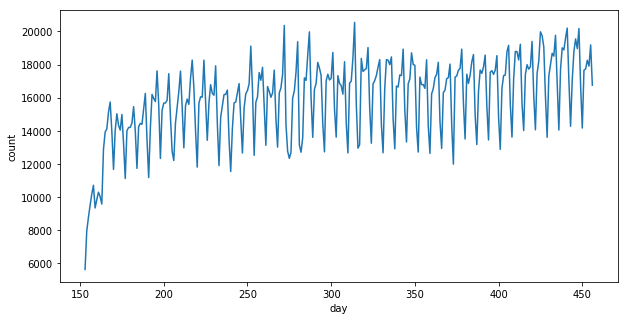

In [16]:
# Plot Time Series
plt.figure(figsize=(10, 5))
plt.plot(np.array(gr2.index), np.array(gr2))
plt.xlabel('day')
plt.ylabel('count')
plt.show()

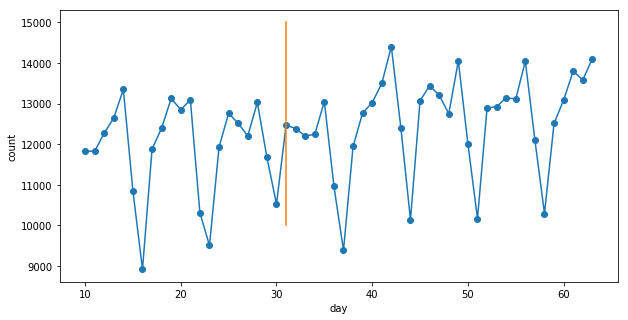

In [17]:
# Enlarge a bit
part_transaction = transactions.loc[np.logical_and(transactions.day >= 10, transactions.day <= 63)]

gr = part_transaction.groupby('day')['amount'].count()

plt.figure(figsize=(10, 5))
plt.plot(np.array(gr.index), np.array(gr), 'o-')
plt.plot([31, 31], [10000, 15000])
plt.xlabel('day')
plt.ylabel('count')
plt.show()

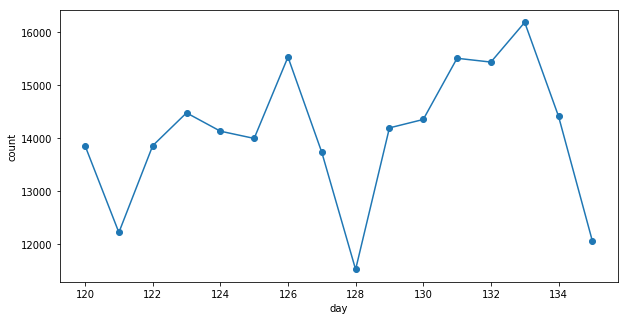

In [18]:
# Except working days
part_transaction = transactions.loc[np.logical_and(transactions.day >= 31+28+31+30, transactions.day <= 31+28+31+30+15)]

gr = part_transaction.groupby('day')['amount'].count()

plt.figure(figsize=(10, 5))
plt.plot(np.array(gr.index), np.array(gr), 'o-')
plt.xlabel('day')
plt.ylabel('count')
plt.show()

In [19]:
# Housing Data (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
import seaborn as sns
sns.set(style="darkgrid")

data = pd.read_csv("data/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=["Id"])

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

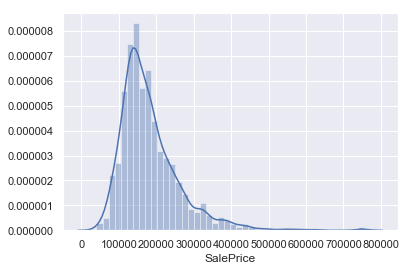

In [21]:
sns.distplot(y_train);

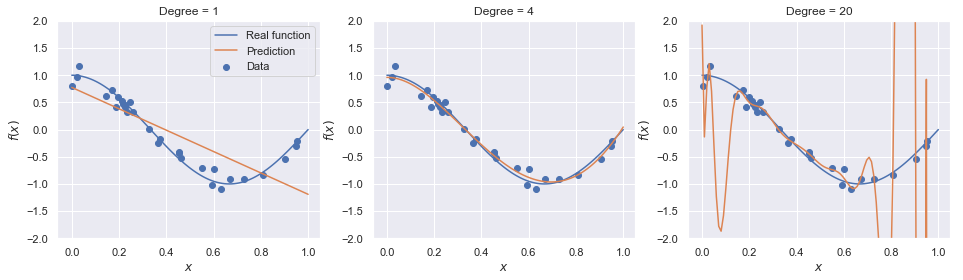

In [22]:
# Modelling
from sklearn.linear_model import LinearRegression

np.random.seed(36)
x = np.linspace(0, 1, 100)
y = np.cos(1.5 * np.pi * x)

x_objects = np.random.uniform(0, 1, size=30)
y_objects = np.cos(1.5 * np.pi * x_objects) + np.random.normal(scale=0.1, size=x_objects.shape)

from sklearn.preprocessing import PolynomialFeatures
fig, axs = plt.subplots(figsize=(16, 4), ncols=3)
for i, degree in enumerate([1, 4, 20]):
    X_objects = PolynomialFeatures(degree).fit_transform(x_objects[:, None])
    X = PolynomialFeatures(degree).fit_transform(x[:, None])
    regr = LinearRegression().fit(X_objects, y_objects)
    y_pred = regr.predict(X)
    axs[i].plot(x, y, label="Real function")
    axs[i].scatter(x_objects, y_objects, label="Data")
    axs[i].plot(x, y_pred, label="Prediction")
    if i == 0:
        axs[i].legend()
    axs[i].set_title("Degree = %d" % degree)
    axs[i].set_xlabel("$x$")
    axs[i].set_ylabel("$f(x)$")
    axs[i].set_ylim(-2, 2)

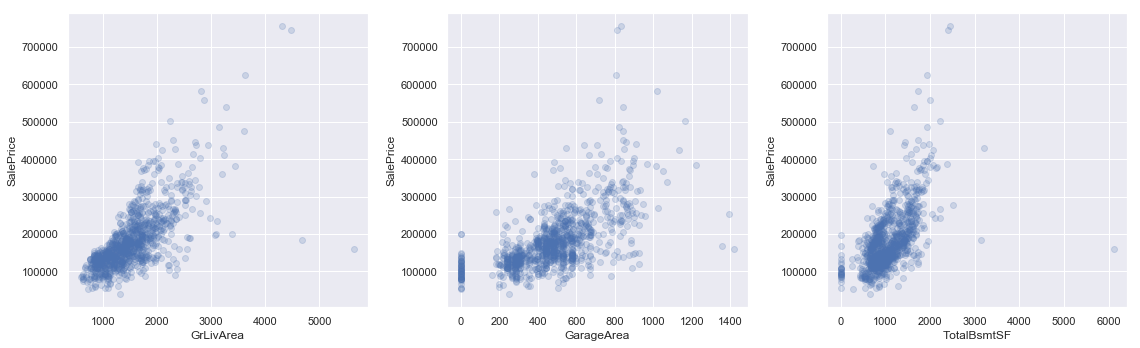

In [23]:
# Features
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate(["GrLivArea", "GarageArea", "TotalBsmtSF"]):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("SalePrice")
plt.tight_layout()

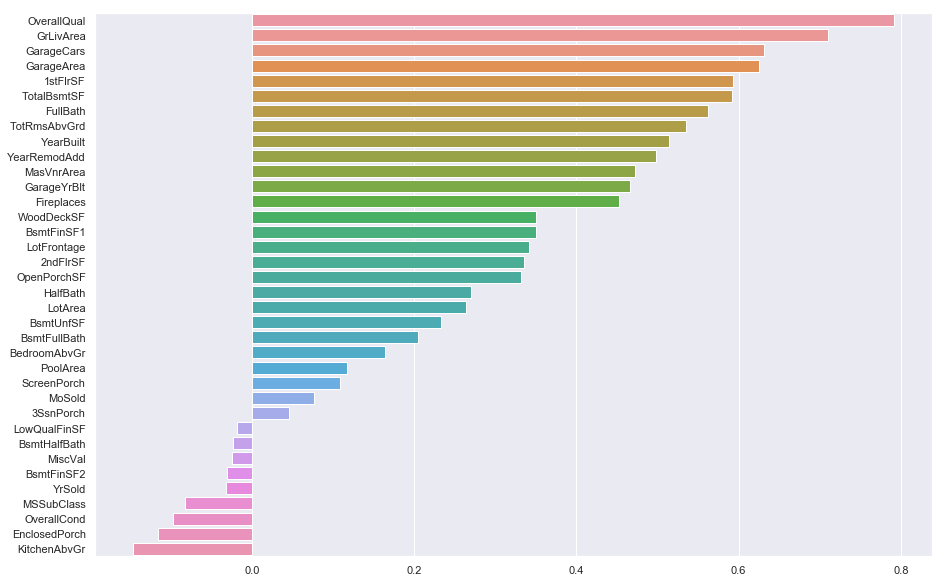

In [24]:
# Correlations
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = {
    feature: np.corrcoef(X_train[feature], y_train)[0][1]
    for feature in numeric_features
}
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]

plot = sns.barplot(y=features_order, x=correlations)
plot.figure.set_size_inches(15, 10)

In [25]:
# Mean Square Error
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 1029496516.9834
Train MSE = 1269590472.7712


In [26]:
# More on linear models
df = pd.read_csv('data/dataset.csv', sep = '\t')
df.index = range(len(df))
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [27]:
# Train vs. Test
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [28]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28,18.2


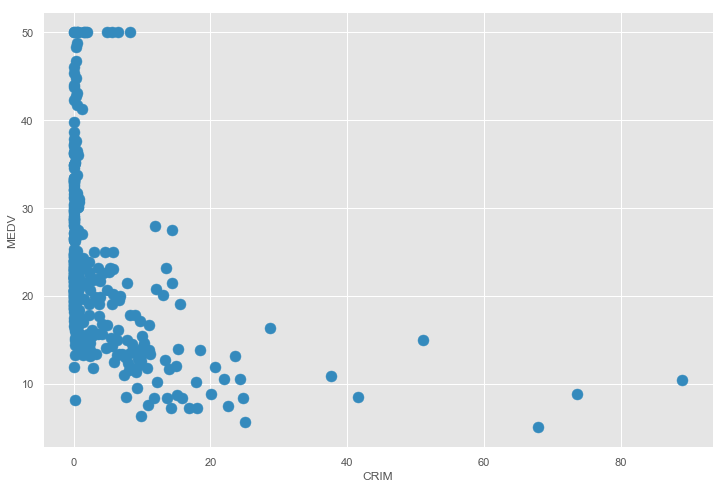

In [29]:
# Plot Scatter
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

df_train.plot(x='CRIM', y='MEDV', kind='scatter', s=120);

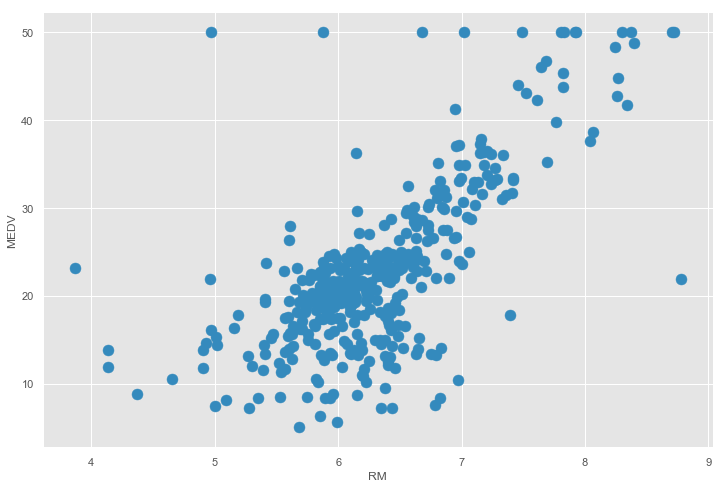

In [30]:
df_train.plot(x='RM', y='MEDV', kind='scatter', s=120);

In [31]:
# OLS

class SimpleLinearRegression():
    def __init__(self, fit_intercept = True):
        self.coef_ = []
        self.intercept_ = 0.0
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y):
        self._solve(np.copy(X), np.copy(y))
        

    def predict(self, X):
        #multiply X on self.coef and add intercept
        return X.dot(self.coef_) + self.intercept_

    
    def _solve(self, X, y):
        #if we find intercept, sub mean from X and y 
        if self.fit_intercept:
            #sub mean
            X_offset = np.mean(X, axis = 0)
            X -= X_offset
        
            y_offset = np.mean(y)
            y -= y_offset

        #analytical solution, A @ B is multiply A on B like matrix
        self.coef_ = np.matmul(np.linalg.inv(X.T @ X), X.T).dot(y)
        
        if self.fit_intercept:
            self._set_intercept(X_offset, y_offset)


    def _set_intercept(self, X_offset, y_offset):
        self.intercept_ = y_offset - X_offset.dot(self.coef_)

In [32]:
X_train = df_train.RM.values.reshape(-1, 1)
y_train = df_train.MEDV.values

In [33]:
# Train the Model
model = SimpleLinearRegression()
model.fit(X_train, y_train)

In [34]:
print('Model:\nprice = %.2f + (%.2f)*rooms' % (model.intercept_, model.coef_[0]))

Model:
price = -36.25 + (9.35)*rooms


In [35]:
print('intercept = {}'.format(model.intercept_), 'coef = {}'.format(model.coef_[0]))

intercept = -36.24631889813794 coef = 9.348301406497725


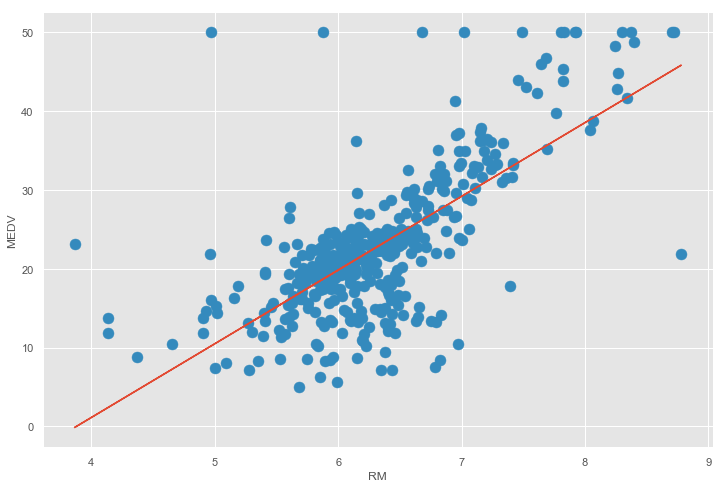

In [36]:
# Plot the Model
df_train.plot(x = 'RM', y = 'MEDV', kind = 'scatter', s=120)

#predict values
y_hat = model.predict(X_train)

plt.plot(X_train, y_hat);

In [38]:
X_train = df_train.drop(columns = ['MEDV']).values
y_train = df_train.MEDV.values

In [39]:
model = SimpleLinearRegression()
model.fit(X_train, y_train)

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

* $\frac{1}{N} \sum_n |\hat{y}_{n}-y_n|$ - mean absolute error
* $\frac{1}{N} \sum_n (\hat{y}_{n}-y_n)^2$ - mean squared error

In [41]:
y_test = df_test.MEDV.values
y_hat = model.predict(df_test.drop(columns = ['MEDV']).values)

In [42]:
print('MAE %.2f' % mean_absolute_error(y_test, y_hat))
print('MSE %.2f' % mean_squared_error(y_test, y_hat))

MAE 3.19
MSE 24.29


In [43]:
# Linear from sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#fit Linear model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
y_test = df_test.MEDV.values
y_hat = model.predict(df_test.drop(columns = ['MEDV']).values)
print('MAE %.2f' % mean_absolute_error(y_test, y_hat))
print('MSE %.2f' % mean_squared_error(y_test, y_hat))

MAE 3.19
MSE 24.29


In [45]:
# Outliers tracking
X_train = df_train.RM.values.reshape(-1, 1)
y_train = df_train.MEDV.values
n = y_train.shape[0]

In [46]:
## Add random outliers
for i in range(10):
    X_train = np.r_[X_train, [[np.random.rand()*20]]]
    y_train = np.r_[y_train, np.random.randn()*10]

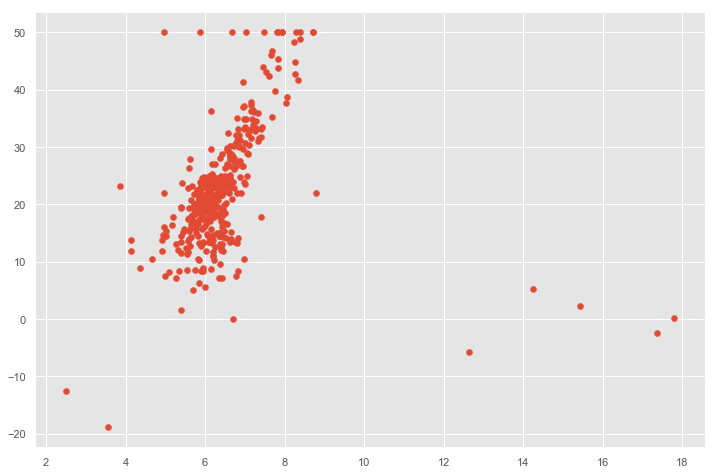

In [47]:
# Plot It
plt.scatter(X_train, y_train);

In [48]:
# Model It
model = SimpleLinearRegression(fit_intercept=True)
model.fit(X_train[:n], y_train[:n])

model_ouliers = SimpleLinearRegression(fit_intercept=True)
model_ouliers.fit(X_train, y_train)

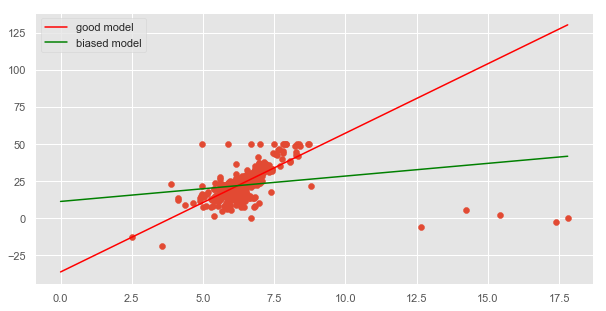

In [49]:
# Done Finally
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model.predict(x)
y_hat_outliers = model_ouliers.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red', label='good model')
ax.plot(x, y_hat_outliers, c='green', label='biased model')
plt.legend();

### KNN Simulation

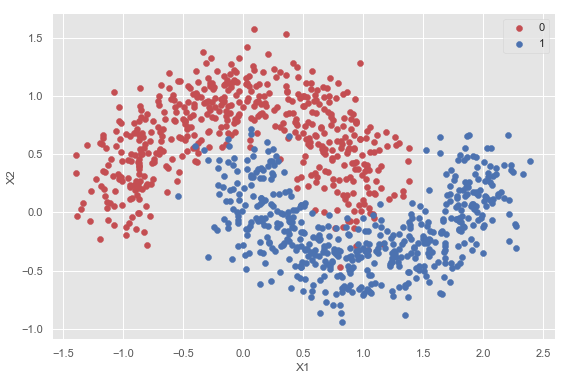

In [50]:
# KNN
from sklearn.datasets import make_moons, load_iris # import function from the library
N = 1000
X, y = make_moons(n_samples=N, noise=0.2, random_state=11) # generate data sample

# Create an figure with a custom size
plt.figure(figsize=(9, 6))

# Plot all objects with y == 0 (class 0)
plt.scatter(X[y == 0, 0],     # selects all objects with y == 0 and the 1st column of X
            X[y == 0, 1],     # selects all objects with y == 0 and the 2nd column of X
            color='r',        # points color
            label='0')        # label for the plot legend


# Plot all objects with y == 1 (class 1)
plt.scatter(X[y == 1, 0],     # selects all objects with y == 1 and the 1st column of X
            X[y == 1, 1],     # selects all objects with y == 1 and the 2nd column of X
            color='b',        # points color
            label='1')        # label for the plot legend

plt.xlabel('X1') # set up X-axis label
plt.ylabel('X2') # set up Y-axis label

plt.legend(loc='best') # create the plot legend and set up it position
plt.grid(b=1) # create grid on the plot

plt.show() # display the plot

In [51]:
# import train_test_split function to split the sample
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5,    # 20% for test, 80% for train
                                                    random_state=123) # shuffle objects before split

In [52]:
print("X, y shapes: ", X.shape, y.shape)
print("X_train, y_train shapes: ", X_train.shape, y_train.shape)
print("X_test, y_test shapes: ", X_test.shape, y_test.shape)

X, y shapes:  (1000, 2) (1000,)
X_train, y_train shapes:  (500, 2) (500,)
X_test, y_test shapes:  (500, 2) (500,)


In [54]:
class KNNClassifier(object):
    
    def __init__(self, k_neighbors=1):
        """
        This is a constructor of the class. 
        Here you can define parameters (k_neighbors) of the class and 
        attributes, that are visible within all methods of the class.
        
        Parameters
        ----------
        k_neighbors : int
            Number of neighbors used for classification.
        """
        
        # Make this parameter visible in all methods of the class
        self.k_neighbors = k_neighbors
        
        # Lets define variables for data, that will be used during the classifier fit and predict
        self.X_train = None
        self.y_train = None
                
    
    def fit(self, X, y):
        """
        This method trains the KNN classifier. 
        Actualy, the KNN classifier has no training procedure.
        It just remembers data (X, y) that will be used for predictions.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
        y : numpy.array, shape = (n_objects)
            1D array with the object labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
        """
        
        # Just save X and y. There is no training procedure for KNN classifier
        self.X_train = X
        self.y_train = y
        
    
    def calculate_distances(self, X, one_x):
        """
        This method calculates distances between one object and all other objects.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
        one_x : numpy.array, shape = (n_features)
        """
        
        dists = np.sqrt( np.sum( (X - one_x)**2, axis=1 ) )
        return dists
    
    
    def predict(self, X):
        """
        This methods performs labels prediction for new objects.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
            
        Returns
        -------
        y_predicted : numpy.array, shape = (n_objects)
            1D array with predicted labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
        """
        
        # Create an empty list for predicted labels
        y_predicted = []
        
        # For each object in X make prediction
        for one_x in X:
            
            # one_x = [0.2, 0.57] (example)
            
            # Calculate distances between an object and all objects from train smaple
            distances = self.calculate_distances(self.X_train, one_x)
            # distances = [0.25, 0.10, 0.32, 0.05] (example)
            
            # Sort the distances and get indeces of the sorted order
            sorted_indeces = distances.argsort()
            # sorted_indeces = [3, 1, 0, 2] (example)
            
            # Get k_neighbors from train sample with the smallest distances
            k_neighbors_indeces = sorted_indeces[:self.k_neighbors] # take the first k_neighbors elements
            # k_neighbors_indeces = [3, 1, 0], for k_neighbors=2 (example)
            
            # Get labels of these k_neighbors
            k_neighbors_labels = self.y_train[k_neighbors_indeces]
            # k_neighbors_labels = [0, 1, 0] (example)
            
            # Get list of unique labels and counts of each label
            unique_labels, label_counts = np.unique(k_neighbors_labels, return_counts=True)
            # unique_labels = [0, 1] (example)
            # label_counts  = [2, 1] (example)
            
            # Get label with the maximum count
            label_max_count = unique_labels[label_counts == label_counts.max()][0]
            # label_max_count = 0 (example)
            
            # Save the predicted label
            y_predicted.append(label_max_count)
            
        return np.array(y_predicted) # return numpy.array

In [55]:
# Create a KNN classifier object
knn = KNNClassifier(k_neighbors=2)

# Train the classifier (remember, that KNN has no training procedure, but it is a tradition :)
knn.fit(X_train, y_train)

# Use the classifier to predict labels
y_test_predict = knn.predict(X_test)

In [56]:
# Let's print out the first 20 predicted labels
y_test_predict[:20]

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [57]:
# Let's print out the first 20 true test labels
y_test[:20]

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0],
      dtype=int64)

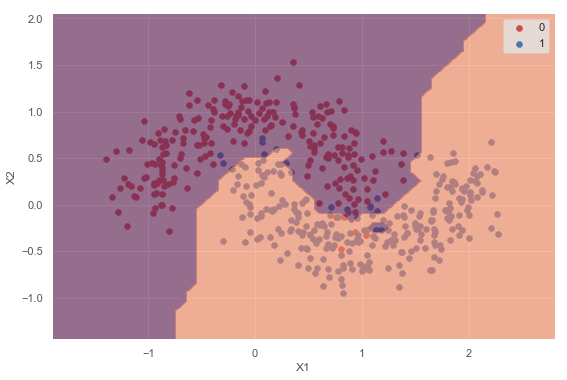

In [65]:
# Create an figure with a custom size
plt.figure(figsize=(9, 6))

# Plot all objects with y == 0 (class 0)
plt.scatter(X_test[y_test == 0, 0],     # selects all objects with y == 0 and the 1st column of X
            X_test[y_test == 0, 1],     # selects all objects with y == 0 and the 2nd column of X
            color='r',                  # points color
            label='0')                  # label for the plot legend


# Plot all objects with y == 1 (class 1)
plt.scatter(X_test[y_test == 1, 0],     # selects all objects with y == 1 and the 1st column of X
            X_test[y_test == 1, 1],     # selects all objects with y == 1 and the 2nd column of X
            color='b',                  # points color
            label='1')                  # label for the plot legend


### THIS IS JUST MAGIC :)

# plot decision boundary
h=0.1
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=.6, levels=1)

### THE END OF THE MAGIC


plt.xlabel('X1') # set up X-axis label
plt.ylabel('X2') # set up Y-axis label

plt.legend(loc='best') # create the plot legend and set up it position
plt.grid(b=1) # create grid on the plot

plt.show() # display the plot

Let's measure the quality using **accuracy score**:

$$
\text{Accuracy }(y\_true, y\_predict) = \frac{1}{N} \sum_{i=1}^{N} I(y\_predict_{i} == y\_true_{i})
$$

For the accuracy calculation we use function **accuracy_score** from the scukit-learn library.

In [66]:
# Import accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate accuracy for the test sample
accuracy_test = accuracy_score(y_test, y_test_predict)

print("Test accuracy of KNN classifier: ", accuracy_test)

Test accuracy of KNN classifier:  0.954


In [67]:
# Logistic
#generate two linear separated samples
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

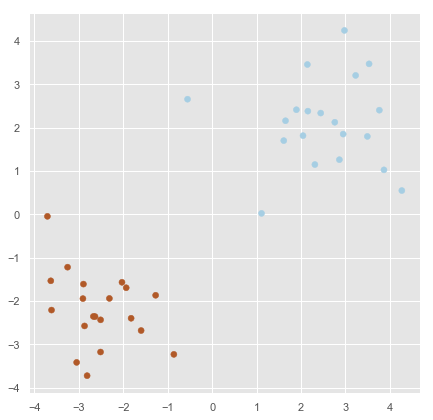

In [68]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired);

In [69]:
class SimpleLogisticRegression:
    def __init__(self, C = 1.0, fit_intercept = True, penalty = 'l2', max_iter = 5000):
        self.C = C
        self.fit_intercept = fit_intercept
        self.penalty = penalty
        self.max_iter = max_iter
    
    
    def fit(self, X, y):        
        #zero initialization
        self.coef_ = np.zeros(X.shape[1])
        self.intercept_ = 0.0
        
        #run grad descent
        self.qual_ = self.grad_descent(X, y, 0.05)
        
    def predict_proba(self, X):
        return np.array([1 / (1 + np.exp(X.dot(self.coef_) + self.intercept_)),\
                         1 / (1 + np.exp(-X.dot(self.coef_) - self.intercept_))])
    
    def predict(self, X):
        predict = (self.predict_proba(X)[1, :] > 0.5).astype(int)
        
        #transform 0 to -1
        predict[predict == 0] = -1
        
        return predict
    
    def decision_function(self, X):
        return X.dot(self.coef_) + self.intercept_

    #labels of classes {1, -1}
    def loss(self, X, y):
        loss = np.mean(np.log(1 + np.exp((-X.dot(self.coef_) + self.intercept_) * y)))
        if self.penalty == 'l2':
            reg = np.sum(self.coef_ ** 2)
            if self.fit_intercept:
                reg += self.intercept_ ** 2
        elif self.penalty == 'l1':
            reg = np.sum(np.abs(self.coef_))
            if self.fit_intercept:
                reg += np.abs(self.intercept_)
        else:
            raise NotImplementedError
        
        return loss + reg / (self.C * X.shape[0])
    
    def grad_descent(self, X, y, eta ):
        qual = np.zeros(self.max_iter)
        
        for iterations in range(self.max_iter):
            #calculate gradient
            decision_function = -(X.dot(self.coef_) + self.intercept_)
            grad_coef = -np.exp(decision_function * y) / (1 + np.exp(decision_function * y))
            grad_coef *= y
            
            if isinstance(X, np.ndarray):
                mean_grad = np.mean(X.T * grad_coef, axis = 1)
            elif isinstance(X, scipy.sparse.csr.csr_matrix):
                mean_grad = np.array(np.mean(X.T.multiply(grad_coef), axis = 1)[:, 0]).reshape(-1)
            else:
                raise NotImplementedError

            w = np.copy(self.coef_)
            self.coef_ -= eta * mean_grad
            
            if self.fit_intercept:
                w_0 = self.intercept_
                self.intercept_ -= eta * np.mean(grad_coef)
    
            #add penalty
            if self.penalty == 'l2':
                self.coef_ -= 2 * eta * w / (self.C * X.shape[0])
                if self.fit_intercept:
                    self.intercept_ -= 2 * eta * w_0 / (self.C * X.shape[0])
            elif self.penalty == 'l1':
                self.coef_ -= eta * np.sign(w) / (self.C * X.shape[0])
                if self.fit_intercept:
                    self.intercept_ -= eta * np.sign(w_0) / (self.C * X.shape[0])
            else:
                raise NotImplementedError
            qual[iterations] = self.loss(X, y)

        return qual

In [70]:
model = SimpleLogisticRegression(C=1.0, 
                           fit_intercept=True, 
                           penalty='l2')
model.fit(X, y)

In [71]:
print('w_0 = %f' % model.intercept_)
print('w_1, w_2 = ', model.coef_)

w_0 = -0.113541
w_1, w_2 =  [-0.91292259 -0.8538947 ]


In [72]:
y_hat = model.predict(X)
y_hat

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [73]:
y_hat_proba = model.predict_proba(X)
y_hat_proba[:20, :]

array([[0.99631323, 0.99842854, 0.98920287, 0.98769405, 0.98022867,
        0.99344189, 0.98840871, 0.98709704, 0.99212355, 0.96097233,
        0.86699141, 0.97817449, 0.98876487, 0.97150491, 0.99816919,
        0.98388157, 0.75865225, 0.96961838, 0.99697267, 0.95414983,
        0.00372155, 0.03516082, 0.01393339, 0.01984218, 0.00621154,
        0.01970056, 0.0074316 , 0.04393683, 0.04306236, 0.01326958,
        0.01285584, 0.00355267, 0.02656606, 0.01084474, 0.01471548,
        0.06633797, 0.03123993, 0.02564213, 0.00893025, 0.0251713 ],
       [0.00368677, 0.00157146, 0.01079713, 0.01230595, 0.01977133,
        0.00655811, 0.01159129, 0.01290296, 0.00787645, 0.03902767,
        0.13300859, 0.02182551, 0.01123513, 0.02849509, 0.00183081,
        0.01611843, 0.24134775, 0.03038162, 0.00302733, 0.04585017,
        0.99627845, 0.96483918, 0.98606661, 0.98015782, 0.99378846,
        0.98029944, 0.9925684 , 0.95606317, 0.95693764, 0.98673042,
        0.98714416, 0.99644733, 0.97343394, 0.9

In [74]:
dec_func = model.decision_function(X)
dec_func

array([-5.59931133, -6.45417481, -4.51761944, -4.38529003, -3.90355303,
       -5.02047304, -4.44584215, -4.33731148, -4.83597095, -3.20367472,
       -1.87461534, -3.80260852, -4.47741109, -3.52911465, -6.30116241,
       -4.11154194, -1.14530469, -3.46306466, -5.79704191, -3.03544185,
        5.58988669,  3.31202904,  4.25943552,  3.8999035 ,  5.07511481,
        3.90721087,  4.89455432,  3.08007109,  3.10108898,  4.30892294,
        4.34101808,  5.63649639,  3.60119549,  4.51317079,  4.20403048,
        2.64435214,  3.43431981,  3.63754214,  4.70934026,  3.65655726])

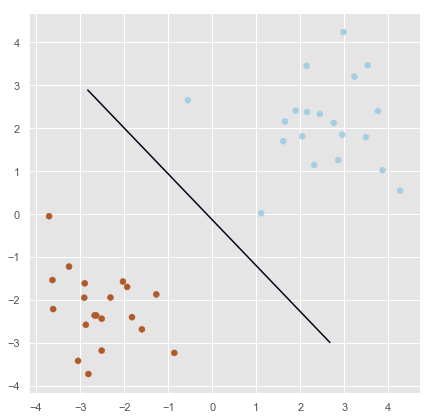

In [75]:
fig, ax = plt.subplots(figsize=(7, 7))
x0, x1 = np.meshgrid(np.arange(-3, 3, 0.1),
                       np.arange(-3, 3, 0.1))
xx0, xx1 = x0.ravel(), x1.ravel()

X_grid = np.c_[xx0, xx1, ]

y_hat = model.decision_function(X_grid)
y_hat = y_hat.reshape(x0.shape)

plt.contour(x0, x1, y_hat, levels=[0])


ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired);

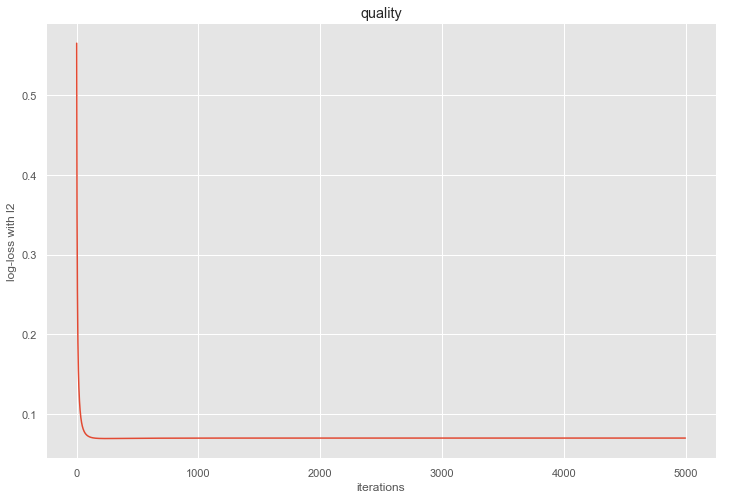

In [76]:
# Quality vs. Loss
qual = model.qual_
x = np.arange(0, len(qual))
plt.title('quality')
plt.plot(x, qual)
plt.xlabel('iterations')
plt.ylabel('log-loss with l2');